In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 


In [182]:
X,y = make_blobs(2000, 2, centers=5, random_state= 42)
n_features = X.shape[1]
m = X.shape[0]
print(X.shape, y.shape)

(2000, 2) (2000,)


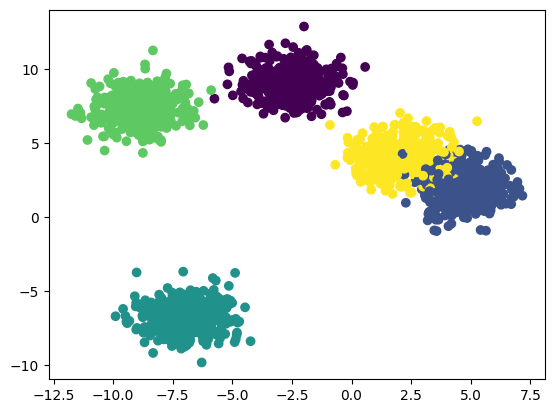

In [183]:
xt = np.array([-10,5])

plt.scatter(X[:,0], X[:,1],  c=y)
plt.show()

In [184]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.80)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(1600, 2) (400, 2) (1600,) (400,)


In [185]:
def dist(p,q):
    return np.sqrt(np.sum((p - q)**2))

def knn(X,y,xt, k=5):
    m = X.shape[0]
    dlist = []

    for i in range(m):
        d = dist(X[i], xt)
        dlist.append((d,y[i]))

    dlist = sorted(dlist)
    dlist = np.array(dlist[:k])
    labels = dlist[:,1]
            # Use np.unique to get unique labels and their counts
    values, counts = np.unique(labels, return_counts=True)

        # Find the index of the maximum count
    index = np.argmax(counts)

        # Get the most frequent label
    most_frequent_value = values[index]
    return int(most_frequent_value)


In [186]:
def predict(Xtrain, ytrain, Xtest):
    predict_List = []

    for i in range (Xtest.shape[0]):
        # Assuming knn returns an array of labels
        value = knn(Xtrain, ytrain, Xtrain[i,:], 100)


        # print(most_frequent_value)

        # Append the most frequent label to the predictions list
        predict_List.append(value)
    
    return predict_List

In [187]:
predicted = predict(Xtrain, ytrain, Xtest)


In [188]:
print(predicted[3])
print(ytest[3])

1
3


In [190]:
accuracy_score(ytest, predicted)

0.175

KNN is used to predict when the data is non linear and it acts as a basis to Deep learning